In [25]:
import pandas as pd

cbrs3 = pd.read_csv("D:/Matana/Semester 5/ANALISIS MULTIVARIAT/Cluster Based Recommender System/Foodpanda.csv")
cbrs3

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,C6849,Male,Adult,Multan,11/25/2024,O10849,8/22/2025,Pizza Hut,Burger,Italian,4,875.71,Cash,28,11/29/2024,166,Active,5,12/30/2024,Cancelled
5996,C3787,Female,Adult,Islamabad,1/28/2025,O7787,8/22/2025,KFC,Pizza,Italian,5,1118.26,Cash,12,6/8/2025,193,Inactive,3,2/9/2025,Delayed
5997,C2841,Other,Teenager,Islamabad,10/19/2023,O6841,8/22/2025,KFC,Sandwich,Italian,4,1005.83,Card,31,12/30/2024,278,Active,4,3/23/2025,Cancelled
5998,C1624,Male,Adult,Islamabad,6/17/2024,O5624,8/22/2025,KFC,Fries,Fast Food,4,1226.10,Card,37,12/27/2024,55,Inactive,2,3/15/2025,Delivered


In [26]:
cols_used = [
    "customer_id", "order_date", "category", "order_frequency",
    "quantity", "price", "last_order_date", "loyalty_points"
]
df = cbrs3[cols_used]
df

,customer_id,order_date,category,order_frequency,quantity,price,last_order_date,loyalty_points
0,C5663,8/23/2023,Italian,38,5,1478.27,7/19/2025,238
1,C2831,8/23/2023,Italian,24,3,956.04,11/25/2024,81
2,C2851,8/23/2023,Italian,42,2,882.51,5/10/2025,82
3,C1694,8/23/2023,Dessert,27,4,231.30,7/24/2025,45
4,C4339,8/24/2023,Dessert,35,1,1156.69,12/21/2024,418
...,...,...,...,...,...,...,...,...
5995,C6849,8/22/2025,Italian,28,4,875.71,11/29/2024,166
5996,C3787,8/22/2025,Italian,12,5,1118.26,6/8/2025,193
5997,C2841,8/22/2025,Italian,31,4,1005.83,12/30/2024,278
5998,C1624,8/22/2025,Fast Food,37,4,1226.10,12/27/2024,55


# Pre Processing data

In [27]:
df.isnull().sum()

customer_id        0
order_date         0
category           0
order_frequency    0
quantity           0
price              0
last_order_date    0
loyalty_points     0
dtype: int64

In [28]:
df_sample3 = df.sample(n=400, random_state=42)
df_sample3

,customer_id,order_date,category,order_frequency,quantity,price,last_order_date,loyalty_points
1782,C5897,3/27/2024,Dessert,23,5,526.51,11/7/2024,235
3917,C3410,12/10/2024,Continental,48,3,755.84,2/14/2025,305
221,C6496,9/17/2023,Continental,30,2,226.01,11/14/2024,402
2135,C5820,5/10/2024,Chinese,50,3,1294.71,4/11/2025,161
5224,C3271,5/18/2025,Fast Food,12,1,359.52,2/13/2025,54
...,...,...,...,...,...,...,...,...
1864,C4505,4/7/2024,Italian,30,5,328.79,8/22/2024,329
3094,C2639,9/2/2024,Italian,37,5,929.29,3/5/2025,265
65,C3797,8/30/2023,Chinese,13,3,266.63,9/14/2024,429
3403,C1385,10/6/2024,Chinese,3,5,1184.49,12/24/2024,394


Kolom numerik: ['order_frequency', 'quantity', 'price', 'loyalty_points']


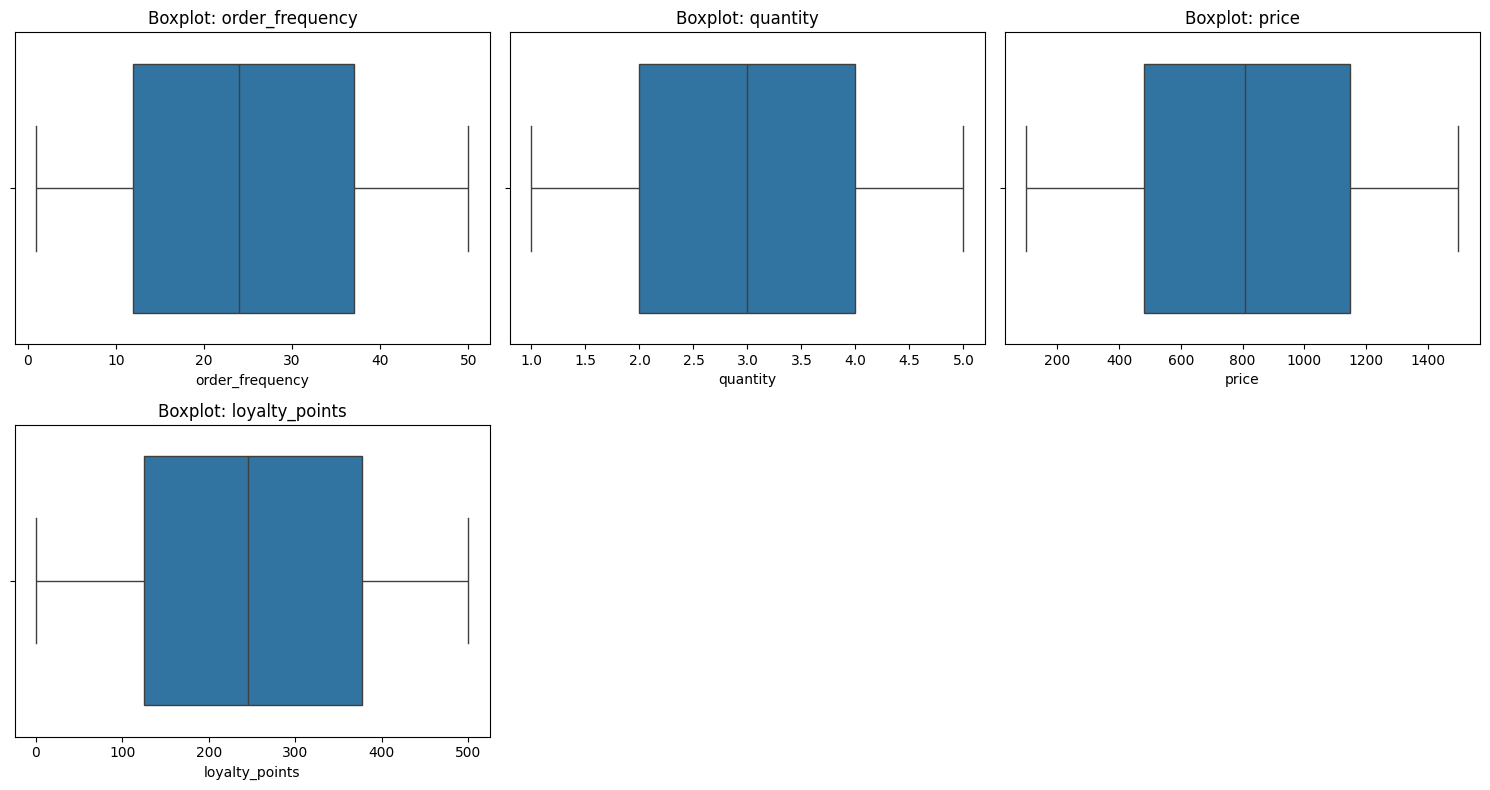

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik yang ada
num_cols = df_sample3.select_dtypes(include='number').columns
print("Kolom numerik:", num_cols.tolist())

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_sample3[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()


In [46]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik untuk clustering
numeric_features = ["order_frequency", "quantity", "price", "loyalty_points"]

# Standarisasi data numerik
scaler = StandardScaler()
scaled_values3 = scaler.fit_transform(df_sample3[numeric_features])

# Simpan kembali sebagai DataFrame
df_scaled3 = pd.DataFrame(scaled_values3, index=df_sample3.index, columns=numeric_features)
df_scaled3

,order_frequency,quantity,price,loyalty_points
1782,-0.122807,1.410844,-0.701176,-0.082516
3917,1.636601,-0.034323,-0.119684,0.400135
221,0.369828,-0.756906,-1.463127,1.068952
2135,1.777354,-0.034323,1.246682,-0.592747
5224,-0.896946,-1.479489,-1.124598,-1.330514
...,...,...,...,...
1864,0.369828,1.410844,-1.202517,0.565615
3094,0.862462,1.410844,0.320119,0.124334
65,-0.826570,-0.034323,-1.360131,1.255117
3403,-1.530333,1.410844,0.967207,1.013792


# klasterisasi

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

distortions = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled3)
    
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled3, kmeans.labels_))
for k, s in zip(K, silhouette_scores):
    print(f"K = {k}, Silhouette Score = {s:.3f}")

K = 2, Silhouette Score = 0.184
K = 3, Silhouette Score = 0.186
K = 4, Silhouette Score = 0.192
K = 5, Silhouette Score = 0.208
K = 6, Silhouette Score = 0.207
K = 7, Silhouette Score = 0.215
K = 8, Silhouette Score = 0.215
K = 9, Silhouette Score = 0.222
K = 10, Silhouette Score = 0.230


# plot

Text(0, 0.5, 'Inertia')

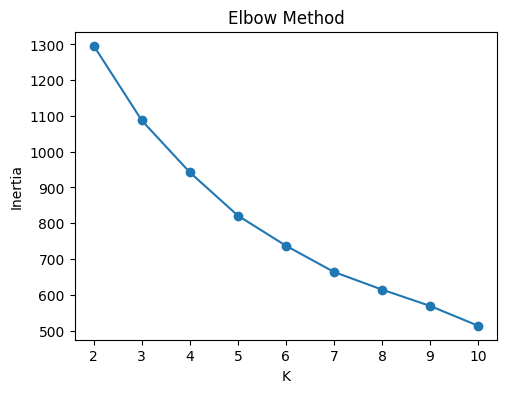

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")

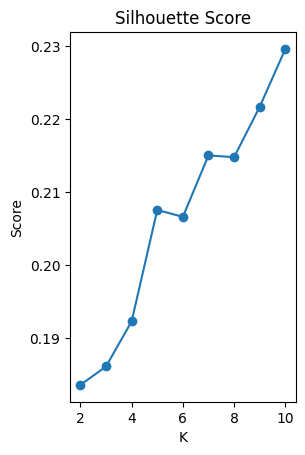

In [49]:
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.show()

In [50]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df_scaled3)
df_scaled3['Cluster_KMeans'] = kmeans.labels_
kmeans

,n_clusters,9
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [51]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=9, linkage='ward')
hier_labels = hier.fit_predict(df_scaled3)
df_scaled3['Cluster_Hier'] = hier_labels
hier_labels

array([8, 1, 1, 3, 6, 1, 8, 1, 2, 1, 3, 7, 3, 0, 2, 0, 1, 8, 5, 4, 6, 2,
       4, 3, 6, 1, 0, 4, 7, 1, 8, 0, 0, 0, 4, 1, 6, 2, 8, 8, 7, 7, 8, 2,
       3, 0, 0, 1, 2, 2, 6, 6, 1, 1, 6, 6, 0, 7, 0, 0, 3, 2, 3, 4, 3, 5,
       4, 5, 2, 4, 7, 3, 4, 0, 8, 0, 2, 0, 2, 7, 6, 8, 8, 0, 2, 1, 7, 6,
       5, 1, 2, 1, 2, 3, 1, 5, 2, 3, 3, 5, 1, 8, 2, 2, 5, 3, 5, 8, 4, 6,
       7, 6, 1, 3, 2, 2, 3, 0, 4, 3, 0, 1, 5, 3, 3, 0, 6, 3, 4, 0, 5, 5,
       5, 2, 0, 2, 2, 8, 8, 0, 1, 4, 6, 0, 7, 3, 7, 4, 6, 2, 4, 7, 5, 6,
       2, 3, 4, 5, 7, 1, 1, 7, 6, 0, 4, 6, 0, 3, 2, 5, 2, 7, 0, 0, 0, 0,
       6, 1, 5, 4, 0, 4, 5, 8, 0, 5, 4, 4, 3, 0, 5, 5, 0, 7, 7, 1, 1, 4,
       3, 6, 1, 0, 4, 6, 5, 0, 3, 5, 7, 4, 0, 3, 8, 5, 4, 5, 7, 1, 3, 5,
       3, 8, 7, 8, 8, 1, 1, 4, 8, 0, 2, 8, 0, 3, 1, 1, 1, 2, 5, 2, 5, 1,
       5, 2, 3, 0, 7, 0, 7, 7, 5, 0, 1, 3, 6, 5, 0, 0, 7, 3, 0, 7, 7, 4,
       3, 2, 1, 0, 8, 4, 3, 0, 5, 1, 1, 0, 0, 5, 2, 0, 5, 7, 3, 5, 2, 3,
       2, 0, 2, 2, 2, 5, 6, 4, 0, 8, 4, 4, 7, 6, 8,

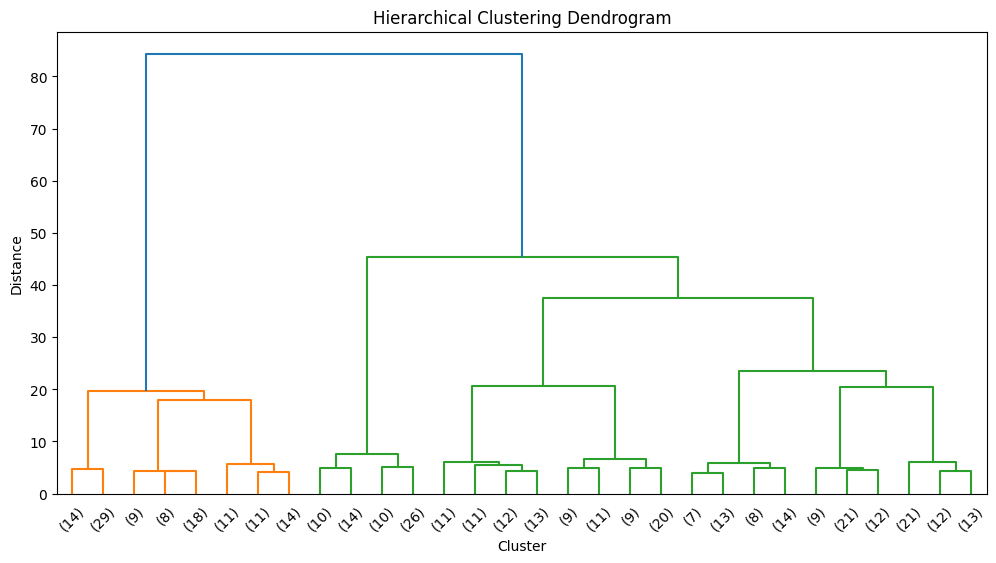

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_scaled3, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="lastp", p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

In [53]:
df_scaled3.groupby('Cluster_KMeans').mean()

,order_frequency,quantity,price,loyalty_points,Cluster_Hier
Cluster_KMeans,,,,,
0,-0.681325,-0.803028,0.218732,1.043279,2.0
1,-0.623090,0.939594,1.005271,-0.319195,4.0
2,0.888314,-0.226029,-0.819465,1.015480,1.0
3,0.922784,-0.430023,1.025857,-0.890218,3.0
4,0.807166,1.032348,0.731284,0.921530,5.0
5,-0.913367,0.423313,-1.076135,0.159729,0.0
6,0.586821,-1.178413,-0.695977,-0.769911,6.0
7,0.609107,0.853423,-0.824123,-0.820283,8.0
8,-1.003329,-0.756906,0.658106,-0.897251,7.0


# Sistem Rekomendasi

In [54]:
random_user = df_scaled3.sample(1, random_state=85)
random_user_id = random_user.index[0]
user_cluster = df_scaled3.loc[random_user_id, 'Cluster_KMeans']
print("User terpilih:", random_user_id)

User terpilih: 865


In [55]:
cluster_members = df_scaled3[df_scaled3['Cluster_KMeans'] == user_cluster].index

In [56]:
import numpy as np

cluster_members = cluster_members[cluster_members != random_user_id]

# hitung ulang distance tanpa dirinya sendiri
distances = {}
for user in cluster_members:
    dist = np.linalg.norm(df_scaled3.loc[random_user_id] - df_scaled3.loc[user])
    distances[user] = dist

In [57]:
top_3_recommendations = sorted(distances, key=distances.get)[:3]
print("\nTop 3 rekomendasi pengguna paling mirip:")
for user in top_3_recommendations:
    print(f"User {user} → Distance: {distances[user]:.4f}")


Top 3 rekomendasi pengguna paling mirip:
User 2622 → Distance: 0.5091
User 4747 → Distance: 0.6703
User 3484 → Distance: 0.7277


# Evaluasi Sistem

In [58]:
def purity_score(y_true, y_pred):
    contingency = np.zeros((len(np.unique(y_pred)), len(np.unique(y_true))))
    for i in range(len(y_pred)):
        contingency[y_pred[i], y_true[i]] += 1
    return np.sum(np.max(contingency, axis=1)) / np.sum(contingency)

purity_kmeans = purity_score(hier_labels, kmeans.labels_)
purity_hier = purity_score(kmeans.labels_, hier_labels)

In [60]:
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(hier_labels, kmeans.labels_)

In [59]:
def wcd(data, labels):
    total = 0
    for c in np.unique(labels):
        cluster_points = data[labels == c]
        center = cluster_points.mean(axis=0)
        total += np.sum(np.linalg.norm(cluster_points - center, axis=1))
    return total

wcd_kmeans = wcd(df_scaled3.values, kmeans.labels_)
wcd_hier = wcd(df_scaled3.values, hier_labels)


In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means Evaluation
sil_kmeans = silhouette_score(df_scaled3, kmeans.labels_)
db_kmeans = davies_bouldin_score(df_scaled3, kmeans.labels_)

# Hierarchical Evaluation
sil_hier = silhouette_score(df_scaled3, hier_labels)
db_hier = davies_bouldin_score(df_scaled3, hier_labels)

print("=== Evaluasi K-Means ===")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")

print("\n=== Evaluasi Hierarchical Clustering ===")
print(f"Silhouette Score: {sil_hier:.4f}")
print(f"Davies-Bouldin Index: {db_hier:.4f}")


=== Evaluasi K-Means ===
Silhouette Score: 0.5307
Davies-Bouldin Index: 0.7304

=== Evaluasi Hierarchical Clustering ===
Silhouette Score: 0.5307
Davies-Bouldin Index: 0.7304
